In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from scipy.special import softmax
from sklearn.datasets import load_iris
#from mlxtend.data import iris_data
from sklearn.preprocessing import OneHotEncoder

#from mlxtend.plotting.decision_regions import plot_decision_regions
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# %matplotlib inline
# %matplotlib widget

# Load IRIS DATA

In [23]:
iris = load_iris()
iris_dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

X = iris.data
y = iris.target


# Logistic Regression class -Fit predict and accuracy methods

In [24]:

class LogisticRegression:
    def __init__(self, batch_size=32, regularization=0, max_epochs=1000):
        """Linear Regression using Gradient Descent.
        Parameters:
        -----------
        batch_size: int
            The number of samples per batch.
        regularization: float
            The regularization parameter.
        max_epochs: int
            The maximum number of epochs.
        patience: int
            The number of epochs to wait before stopping if the validation loss
            does not improve.
        """
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None
    def cross_entropy(self,pred,target):
        return - target * np.log(pred)
    def fit(self, X, y, batch_size=32, regularization=0, max_epochs=1000,lr = 0.001):
    
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.lr = lr
    
        
        rows_sample,column_sample = X.shape
        num_classes = np.max(y, axis=0) + 1 #number of classes=3
        #print(column_sample,num_classes)
        
        weights = np.random.rand(column_sample,num_classes)
        bias = np.random.rand(1,num_classes)
        #bias = 1

        
        for j in range(self.max_epochs):
            
            random_num = np.random.permutation(rows_sample)
            X_new = X[random_num]
            y_new = y[random_num]
            
            for i in range(0, rows_sample, batch_size):
                X_batch = X_new[i : i+batch_size]       #taking X batch
                y_batch = y_new[i : i+batch_size]       #taking Y batch

                y_batch = np.eye(num_classes)[y_batch] #one hot encoding on y_batch data
            
                
                #take dot product of X_batch data and weights
                linear_pred = np.dot(X_batch,weights) + bias
           
                #Apply Softmax 
                y_pred = self.softmax(linear_pred)
                err = (y_pred - y_batch)
                dw = (1/X_batch.shape[0]) * np.dot(X_batch.T,err)
                db = (1/X_batch.shape[0]) * np.sum(err, axis=0, keepdims=True)
                
                #Update weights
                weights = weights - (self.lr * dw)
                bias =  bias - self.lr * db

        #Training completed,update weight & bias values    
        self.weights = weights
        self.bias = bias

    def predict(self,X):
        linear_pred = np.dot(X,self.weights)+self.bias
        #apply softmax and take max value index
        y_pred = self.softmax(linear_pred)
        y_pred = np.argmax(np.array((y_pred)), axis=1)
        return y_pred
    
    def accuracy(self,y_pred,y_test):
        return np.array((np.mean(y_pred == y_test)))*100
        
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
        

# Split the dataset into training and testing sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state = 1)


# Train model and calculate accuracy for all features

In [26]:
#Store all logistic regression accuracy results in dictionary
LR_dict={}

lr1 = LogisticRegression()

#Call fit method
lr1.fit(X_train, y_train)

In [27]:
#Call predict method
predict = lr1.predict(X_test)

#call accuracy method
acc = lr1.accuracy(predict,y_test)


print("Accuracy all features Logistic Regression:",round(acc,2),"%")
LR_dict["Accuracy all features Logistic Regression:"] = round(acc,2)
#print(LR_dict)

Accuracy all features Logistic Regression: 86.67 %


# Train model,calculate accuracy and plot for Petal length and width

In [28]:
lr2 = LogisticRegression()

#print(X_train.shape)
#print(X_train[:,2:].shape)

#call fit method
lr2.fit(X_train[:,2:], y_train)

Accuracy Petal length and width Logistic Regression: 60.0 %


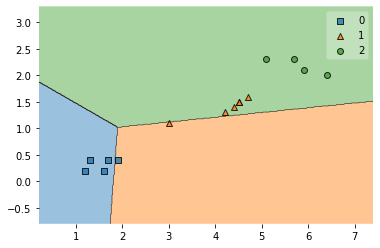

In [35]:

#call predict method
y_pred = lr2.predict(X_test[:,2:])

#call accuracy method
acc1 = lr2.accuracy(y_pred,y_test)
print("Accuracy Petal length and width Logistic Regression:",round(acc1,2),"%")
LR_dict["Accuracy Petal length and width Logistic Regression:"] = round(acc1,2)
#print(LR_dict)

clf=lr2

plot_decision_regions(X_test[:,2:], y_test, clf=clf)
plt.show()

# Train model,calculate accuracy and plot for Sepal length and width

In [45]:
lr4 = LogisticRegression()


#Call fit method
#sepal length and width
lr4.fit(X_train[:,0:2], y_train)

Accuracy predicting sepal length and width Logistic Regression: 66.67


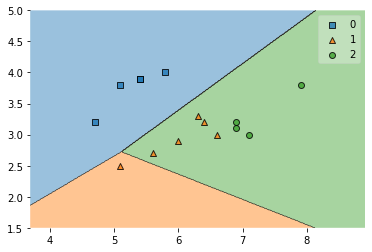

In [46]:


#Call predict method
predict = lr4.predict(X_test[:,0:2])

#Call accuracy method
acc2 = lr4.accuracy(predict,y_test)
print("Accuracy predicting sepal length and width Logistic Regression:",round(acc2,2))
LR_dict["Accuracy predicting sepal length and width Logistic Regression:"] = round(acc2,2)

#Plot decision regions
clf=lr4
plot_decision_regions(X_test[:,0:2], y_test, clf=clf)
plt.show()

# Linear discriminant analysis

In [47]:
def encodeTarget(y, num_classes1):                                   
    #getting targets one hot encoded
    result = np.eye(num_classes1)[np.array(y).reshape(-1)]
    return result.reshape(list(y.shape)+[num_classes1])


class LinearDiscriminantClass:                                                
    def fit(self, X, y):                                       
        all_classes = np.max(y, axis=0) + 1 
        #adding 1s
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=-1)  
        y = encodeTarget(y, all_classes)
        
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y    
        #print(self.weights)
        
    def predict(self, x):
        
        # Adding constant for bias 
        x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=-1)     
        return np.argmax(self.weights.T @ x.T, axis=0)
    def calculateMSE(self,X,y):
        return np.sum(np.abs(self.predict(X) - y))
    def accuracy(self,y,MSE):
        return round((((len(y) - (MSE ))/ len(y))*100),2)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 1)

# Train LDA model and calculate accuracy for sepal length and width

Accuracy sepal length and width LDA 73.33


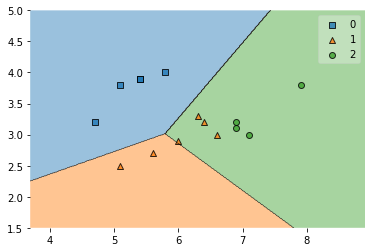

In [49]:
#Store all logistic regression accuracy results in dictionary
LDA_dict={}
ld1 = LinearDiscriminantClass()

ld1.fit(X_train[:,0:2], y_train)
MSE = ld1.calculateMSE(X_test[:,0:2],y_test)
accuracy = ld1.accuracy(y_test,MSE)
print("Accuracy sepal length and width LDA", accuracy)

clf=ld1
plot_decision_regions(X_test[:,0:2], y_test, clf=clf)
plt.show()

LDA_dict["Accuracy Sepal length and width LDA:"] = accuracy

# Train LDA model and calculate accuracy for petal length and width and plot

Accuracy petal length and width LDA 60.0


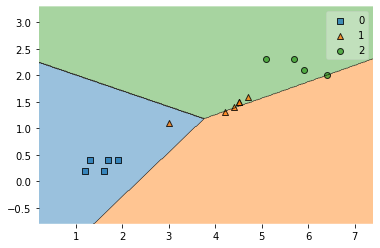

In [50]:
ld2 = LinearDiscriminantClass()
ld2.fit(X_train[:,2:], y_train)

MSE = ld2.calculateMSE(X_test[:,2:],y_test)
accuracy = ld2.accuracy(y_test,MSE)
print("Accuracy petal length and width LDA", accuracy)

clf=ld2
plot_decision_regions(X_test[:,2:], y_test, clf=clf)
plt.show()

LDA_dict["Accuracy Petal length and width LDA:"] = accuracy

# Train LDA model and calculate accuracy all features

In [51]:
ld3 = LinearDiscriminantClass()
ld3.fit(X_train, y_train)


MSE = ld3.calculateMSE(X_test,y_test)
accuracy = ld3.accuracy(y_test,MSE)

print("Accuracy of all features LDA", accuracy)
LDA_dict["Accuracy of all features:"] = accuracy

Accuracy of all features LDA 73.33


# Logistic Regression vs LDA accuracies Comparisons

In [52]:
#print the accuracy results stored in both dictionaries
print("Accuracies with Logistic Regression:")
print(LR_dict) 
print("    vs    ")
print("Accuracies with Linear Discriminant:")
print(LDA_dict)

Accuracies with Logistic Regression:
{'Accuracy all features Logistic Regression:': 86.67, 'Accuracy Petal length and width Logistic Regression:': 60.0, 'Accuracy predicting sepal length and width Logistic Regression:': 66.67}
    vs    
Accuracies with Linear Discriminant:
{'Accuracy Sepal length and width LDA:': 73.33, 'Accuracy Petal length and width LDA:': 60.0, 'Accuracy of all features:': 73.33}
